In [1]:
from Ex2 import sammon
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine

D1 = load_digits()
D2 = load_breast_cancer()
D3 = load_wine()

## Creating the datasets


In [3]:
datasets = [D1, D2, D3]
drTechniques = [PCA, TSNE, sammon]
datasets_name = ['digits', 'breast_cancer', 'wine']
drs_name = ['PCA', 'TSNE', 'Sammon']
font = {'size'   : 19}

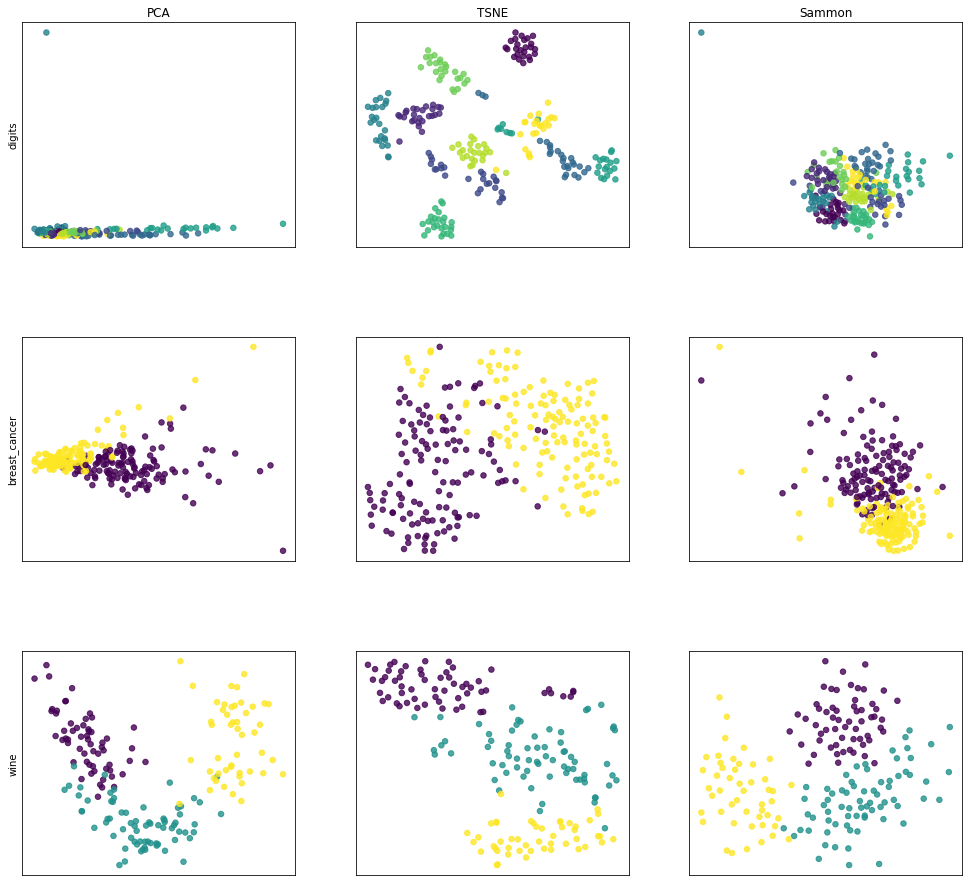

In [5]:
fig1, ax1 = plt.subplots(nrows=3, ncols=3)
i = 0
for row in ax1:
    data = datasets[i]
    # important for data to be normalized otherwise it will not work
    X = preprocessing.normalize(data.data, axis = 0)
    y = data.target
    X, y = X[:250], y[:250]
    j = 0
    for col in row:
        dr = drTechniques[j]
        if dr == sammon:
            Xe = dr(X,1000,  0.000000001, 0.3)
        else:
            if dr == TSNE: 
                Xe = dr(n_components= 2, learning_rate='auto', init='random').fit_transform(X)
            else: 
                Xe = dr(n_components= 2).fit_transform(X)
        col.scatter(Xe[:,0], Xe[:,1], alpha=0.8, c=y, s = 30, cmap='viridis')
        if j == 0:
            col.set_ylabel(datasets_name[i])
        if i == 0:
            col.set_title(drs_name[j])
        col.set_xticks([]),col.set_yticks([])
        j +=1
    i += 1
    
plt.rc('font', **font)
plt.tight_layout()
fig1.set_size_inches(15, 15)

## Q.1 In your opinion, which technique performed the best for each data set, regarding the separation of the classes?

Maximum of 400 samples were utilized
digits had 1797 samples and 10 classes
breast_cancer has 569 samples and 2 classes
wine has 178 samples and 3 classes


for digits I think TSNE performed the best, however PCS and Sammon are also quite accurate, for computer standards, the aim, after all, is for computers to be able to run the info as quickly as possible

for breast_cancer, every single one seems to perform well 

and for wine, the graphs do not look very different from each other and the data is well presented


## Q.2 How are the classes in the data sets separated? Are some classes/data sets easier to separate than others?

p1.
Depending on the technique, PCA utilizes the variance of each value
, TSNE utilizes a Gaussian distribution and combination of the distance of the point to others and Sammon utilizes gradient descent.


p2.
for PCA let's say, you have multiple pictures from Digits and realize that all of them contain a white background that does not help the identification process and so while putting this in the algorithm, this will notice that it's very common on all data points and it's not utilized and so it will be completely ignored and the output will contain images of the values but without any background behind them, so this explains how irrelevant data its separated, and for relevant data then it would utilize the values and look for common grounds and cluster them in an area, then depending on the value of classes you introduced it will try to circle each cluster.

all dr utilizes similar thinking but they reach their conclusions differently and so making some datasets easier to separate and some that dont
